In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', 400)

In [3]:
%load_ext autoreload
%autoreload 2

from utils import *

# Offline tasks

# Automated

## Batch
This need to be done offline, before running the webapp

In [8]:
LIST_CITY_DATA_FILE_NAME

['toronto_venues.csv', 'bangalore_venues.csv', 'pune_venues.csv']

In [9]:
for city_file_name in LIST_CITY_DATA_FILE_NAME:
    prepare_app_data_from_raw_data(city_file_name, return_app_data=False)

## Runtime
all below func are part of web app

### first input

In [21]:
SOURCE_CITY = 'toronto'
DEST_CITY = 'new_york'

SOURCE_VENUE = 'Harbourfront East, Union Station, Toronto Islands'  # 'Agincourt'

In [22]:
file_name = [i for i in LIST_CITY_DATA_FILE_NAME if SOURCE_CITY in i][0]
X_source = read_data_file(file_name=file_name, data_type='artifact_app')

file_name = [i for i in LIST_CITY_DATA_FILE_NAME if DEST_CITY in i][0]
X_dest = read_data_file(file_name=file_name, data_type='artifact_app')

print(X_source.shape, X_dest.shape)

(96, 273) (95, 271)


In [23]:
source_name = SOURCE_VENUE
colList_features = get_common_feature_list(X_source=X_source, X_dest=X_dest)
X_match, X_meta_mapper = perform_match_wrapper(X_source=X_source, X_dest=X_dest, source_name=source_name, 
                                               num_match=None, precise_match=True,
                                               colList_features=colList_features, colList_meta=colList_meta)

In [ ]:
X_match.drop()

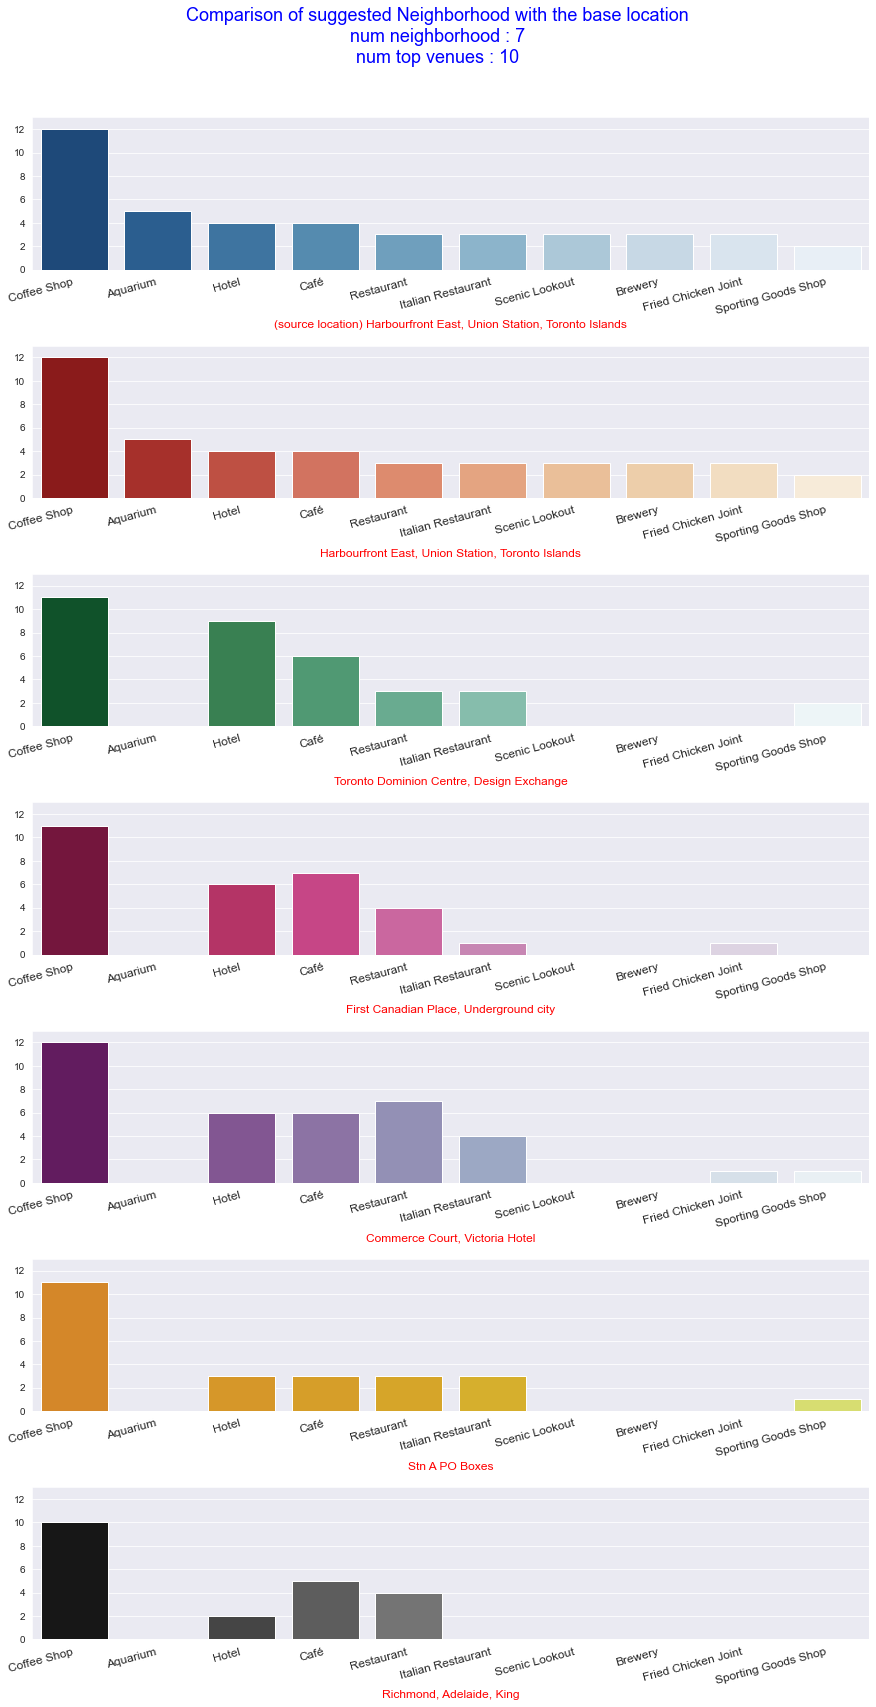

In [66]:
num_venues = 10
num_match = 7

source_name = SOURCE_VENUE
X_match_sorted_named, graph = visualize_venue_match_results_wrapper(X_source=X_source, X_match=X_match,
                                                                    X_meta_mapper=X_meta_mapper,
                                                                    source_name=source_name,
                                                                    colList_features=colList_features,
                                                                    num_match=num_match, num_venues=num_venues)

In [67]:
plot_df = X_match_sorted_named.copy()

## rough work 

In [6]:
import streamlit as st

In [7]:
st.checkbox()

TypeError: selectbox() missing 2 required positional arguments: 'label' and 'options'

In [65]:
#X = pd.read_csv(DATA_PATH_RAW.joinpath(LIST_CITY_DATA_FILE_NAME[0]))
X_raw = pd.read_csv(DATA_PATH_RAW.joinpath(LIST_CITY_DATA_FILE_NAME[2]))

print(X_raw.shape)
X_raw.head(2)

(271, 13)


,Neighborhood,Venue Category,Venue,Id,Neighborhood_Latitude,Neighborhood_Longitude,Location_Formatted_Address,Categories_Name,Location_Address,Location_Postal_Code,Location_City,Location_State,Cluster_Label
0,Dharmaram College,Mall,The Forum Mall,4b5a8814f964a5201cca28e3,12.934603,77.611312,#21 (Kormangala),Shopping Mall,#21,560029,Bangalore,Karnataka,0.0
1,G.K.V.K.,Cineplex,Imax,5c1667a4dff815002c3718af,13.094436,77.595100,Bangalore 560065,Multiplex,NaN,560065,Bangalore,Karnataka,1.0


In [66]:
print(X['Venue Category'].nunique())
#X['Venue Category'].unique()

45


In [68]:
ls_neighborhood

array(['Bannerghatta Road', 'Bangalore', 'Agara', 'HSR', 'H.A.L II Stage',
       'Koramangala VI Bk', 'J P Nagar', 'Doddagubbi', 'Basavanagudi',
       'Fraser Town', 'Bellandur', 'EPIP', 'Adugodi',
       'CMP Centre And School', 'Chikkalasandra', 'Kenchanahalli',
       'Hoodi', 'G.K.V.K.', 'Jayangar III Block'], dtype=object)

In [67]:
ls_neighborhood = neighborhood_haiving_min_n_venues(X_raw=X_raw[[col_grain, col_feature]], min_venues=4)
X = X[X[col_grain].isin(ls_neighborhood)]
X

,Neighborhood,Venue Category,Venue,Id,Neighborhood_Latitude,Neighborhood_Longitude,Location_Formatted_Address,Categories_Name,Location_Address,Location_Postal_Code,Location_City,Location_State,Cluster_Label
0,Adugodi,Caf�,1,1,1,1,1,1,0,1,1,1,1
1,Adugodi,Department Store,1,1,1,1,1,1,1,1,1,1,1
2,Adugodi,Grocery Store,1,1,1,1,1,1,0,1,1,1,1
3,Adugodi,Indie Movies,1,1,1,1,1,1,1,0,1,1,1
4,Adugodi,Lounge,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Koramangala VI Bk,Brewery,2,2,2,2,2,2,0,2,2,2,2
190,Koramangala VI Bk,Burgers,1,1,1,1,1,1,1,1,1,1,1
191,Koramangala VI Bk,Grocery Store,1,1,1,1,1,1,0,1,1,1,1
192,Koramangala VI Bk,Tea Room,1,1,1,1,1,1,1,1,1,1,1
